In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Load the training dataset
train_data = pd.read_csv('/content/fraudTrain.csv')

In [4]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [5]:
train_data.shape

(7815, 23)

In [6]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7815.00000,7.815000e+03,7815.000000,7814.000000,7814.000000,7814.000000,7.814000e+03,7.814000e+03,7814.000000,7814.000000,7814.000000
mean,3907.00000,4.078117e+17,68.661363,49479.396340,38.595821,-90.688408,8.823451e+04,1.325583e+09,38.599153,-90.685832,0.005759
std,2256.14051,1.295068e+18,115.530027,27184.827244,5.198199,14.512405,2.944470e+05,1.359720e+05,5.226026,14.532152,0.075673
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,1953.50000,1.800184e+14,9.785000,26041.000000,34.852700,-97.235100,7.410000e+02,1.325448e+09,34.913072,-97.322865,0.000000
50%,3907.00000,3.518759e+15,48.490000,49259.000000,39.376400,-87.764400,2.395000e+03,1.325583e+09,39.392224,-87.772889,0.000000
75%,5860.50000,4.653879e+15,82.220000,72476.000000,41.846700,-80.143075,1.905400e+04,1.325704e+09,41.923981,-80.187209,0.000000
max,7814.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325815e+09,66.645176,-66.967742,1.000000


In [7]:
train_data.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,7815.00000,7815,7.815000e+03,7815,7815,7815.000000,7815,7815,7814,7814,...,7814.000000,7814.000000,7.814000e+03,7814,7814,7814,7.814000e+03,7814.000000,7814.000000,7814.000000
unique,NaN,7734,NaN,693,14,NaN,331,460,2,897,...,NaN,NaN,NaN,473,883,7814,NaN,NaN,NaN,NaN
top,NaN,2019-01-01 16:52:19,NaN,fraud_Gaylord-Powlowski,gas_transport,NaN,Christopher,Smith,F,43039 Riley Greens Suite 393,...,NaN,NaN,NaN,"Designer, ceramics/pottery",1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,27,819,NaN,155,163,4299,33,...,NaN,NaN,NaN,62,37,1,NaN,NaN,NaN,NaN
mean,3907.00000,NaN,4.078117e+17,NaN,NaN,68.661363,NaN,NaN,NaN,NaN,...,38.595821,-90.688408,8.823451e+04,NaN,NaN,NaN,1.325583e+09,38.599153,-90.685832,0.005759
std,2256.14051,NaN,1.295068e+18,NaN,NaN,115.530027,NaN,NaN,NaN,NaN,...,5.198199,14.512405,2.944470e+05,NaN,NaN,NaN,1.359720e+05,5.226026,14.532152,0.075673
min,0.00000,NaN,6.041621e+10,NaN,NaN,1.010000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.325376e+09,19.165823,-166.550779,0.000000
25%,1953.50000,NaN,1.800184e+14,NaN,NaN,9.785000,NaN,NaN,NaN,NaN,...,34.852700,-97.235100,7.410000e+02,NaN,NaN,NaN,1.325448e+09,34.913072,-97.322865,0.000000
50%,3907.00000,NaN,3.518759e+15,NaN,NaN,48.490000,NaN,NaN,NaN,NaN,...,39.376400,-87.764400,2.395000e+03,NaN,NaN,NaN,1.325583e+09,39.392224,-87.772889,0.000000
75%,5860.50000,NaN,4.653879e+15,NaN,NaN,82.220000,NaN,NaN,NaN,NaN,...,41.846700,-80.143075,1.905400e+04,NaN,NaN,NaN,1.325704e+09,41.923981,-80.187209,0.000000


In [8]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [11]:
# Load the test datasets
test_data = pd.read_csv('/content/fraudTest.csv')

In [12]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [13]:
test_data.shape

(27235, 23)

In [14]:
test_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,27235.000000,2.723500e+04,27235.000000,27235.000000,27234.000000,27234.000000,2.723400e+04,2.723400e+04,27234.000000,27234.000000,27234.000000
mean,13617.000000,4.118996e+17,69.594138,48432.186782,38.550531,-90.008376,9.031500e+04,1.372195e+09,38.546098,-90.011074,0.004259
std,7862.211627,1.301391e+18,136.072715,26773.965282,5.055259,13.552173,3.060605e+05,2.417363e+05,5.092408,13.562147,0.065126
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.584303,0.000000
25%,6808.500000,1.800468e+14,9.570000,25526.000000,34.690200,-96.701000,7.540000e+02,1.371966e+09,34.776847,-96.731896,0.000000
50%,13617.000000,3.519233e+15,46.770000,48034.000000,39.390000,-87.349000,2.457000e+03,1.372195e+09,39.388537,-87.304704,0.000000
75%,20425.500000,4.634956e+15,82.945000,71960.000000,42.015800,-80.124800,2.032800e+04,1.372431e+09,41.982873,-80.153222,0.000000
max,27234.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372581e+09,66.669356,-66.955602,1.000000


In [15]:
test_data.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,27235.000000,27235,2.723500e+04,27235,27235,27235.000000,27235,27235,27235,27235,...,27234.000000,27234.000000,2.723400e+04,27234,27234,27234,2.723400e+04,27234.000000,27234.000000,27234.000000
unique,NaN,26707,NaN,693,14,NaN,338,466,2,909,...,NaN,NaN,NaN,475,895,27234,NaN,NaN,NaN,NaN
top,NaN,2020-06-28 18:38:28,NaN,fraud_Cormier LLC,gas_transport,NaN,Christopher,Smith,F,4293 Ramirez Squares,...,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,87,2664,NaN,518,577,15016,85,...,NaN,NaN,NaN,189,122,1,NaN,NaN,NaN,NaN
mean,13617.000000,NaN,4.118996e+17,NaN,NaN,69.594138,NaN,NaN,NaN,NaN,...,38.550531,-90.008376,9.031500e+04,NaN,NaN,NaN,1.372195e+09,38.546098,-90.011074,0.004259
std,7862.211627,NaN,1.301391e+18,NaN,NaN,136.072715,NaN,NaN,NaN,NaN,...,5.055259,13.552173,3.060605e+05,NaN,NaN,NaN,2.417363e+05,5.092408,13.562147,0.065126
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.163455,-166.584303,0.000000
25%,6808.500000,NaN,1.800468e+14,NaN,NaN,9.570000,NaN,NaN,NaN,NaN,...,34.690200,-96.701000,7.540000e+02,NaN,NaN,NaN,1.371966e+09,34.776847,-96.731896,0.000000
50%,13617.000000,NaN,3.519233e+15,NaN,NaN,46.770000,NaN,NaN,NaN,NaN,...,39.390000,-87.349000,2.457000e+03,NaN,NaN,NaN,1.372195e+09,39.388537,-87.304704,0.000000
75%,20425.500000,NaN,4.634956e+15,NaN,NaN,82.945000,NaN,NaN,NaN,NaN,...,42.015800,-80.124800,2.032800e+04,NaN,NaN,NaN,1.372431e+09,41.982873,-80.153222,0.000000


In [16]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [17]:
train_data['is_fraud'].value_counts()

is_fraud
0.0    7769
1.0      45
Name: count, dtype: int64

<Axes: ylabel='count'>

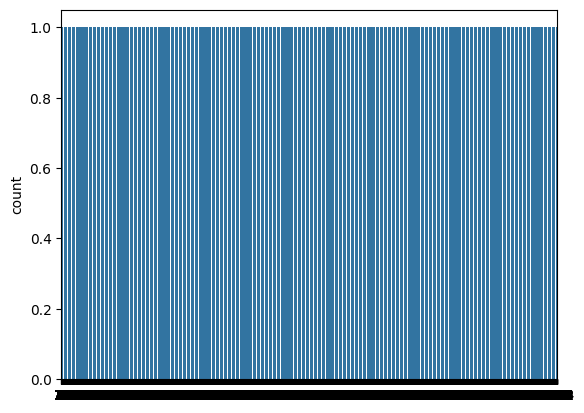

In [18]:
sns.countplot(train_data['is_fraud'])

In [20]:
X = train_data.drop('is_fraud',axis=1)
Y = train_data['is_fraud']

In [41]:
train_data.dropna(inplace=True)

In [42]:
train_data = pd.get_dummies(train_data, drop_first=True)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data.drop('is_fraud', axis=1), train_data['is_fraud'], test_size=0.20, random_state=42)

In [46]:
sc=StandardScaler()
train_data['amt'] = sc.fit_transform(train_data['amt'].values.reshape(-1, 1))

In [47]:
missing_values_X = X_train.isnull().sum()
missing_values_Y = Y_train.isnull().sum()
print("Missing values in X_train:", missing_values_X)
print("Missing values in Y_train:", missing_values_Y)

Missing values in X_train: Unnamed: 0                                    0
cc_num                                        0
amt                                           0
zip                                           0
lat                                           0
                                             ..
trans_num_ffb649dc7dd014a648e82ca540b0917a    0
trans_num_ffd3017613a04ad6df8eef09ca7b9531    0
trans_num_ffdaa290d0841d7babaf495aab382031    0
trans_num_ffe44e74334a90c38bbbade939a3f651    0
trans_num_ffe59d13dcbf7e3a3dedf959d156204d    0
Length: 20176, dtype: int64
Missing values in Y_train: 0


In [48]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# Predictions on the test set
Y_pred = logistic_regression.predict(X_test)

In [50]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9916826615483045
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
